In [1]:
# 확진자의 province와 city 정보를 이용하여 서울시 유동인구와 확진자 수 관계 시각화
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import datetime

In [2]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 코로나 확진자 정보 파일
df1 = pd.read_csv('./data/PatientInfo.csv', header='infer',encoding = 'latin1', na_values=[' '])

In [4]:
df1.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [5]:
df1.shape

(4004, 18)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          4004 non-null   int64  
 1   global_num          2806 non-null   float64
 2   sex                 3674 non-null   object 
 3   birth_year          3266 non-null   float64
 4   age                 3525 non-null   object 
 5   country             4004 non-null   object 
 6   province            4004 non-null   object 
 7   city                3926 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      3211 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         899 non-null    object 
 12  contact_number      680 non-null    object 
 13  symptom_onset_date  534 non-null    object 
 14  confirmed_date      4001 non-null   object 
 15  released_date       1508 non-null   object 
 16  deceas

In [7]:
# 서울 유동인구 파일
df2 = pd.read_csv('./data/SeoulFloating.csv', header='infer',encoding = 'latin1', na_values=[' '])

In [8]:
df2.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


In [9]:
df2.shape

(864000, 7)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864000 entries, 0 to 863999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        864000 non-null  object
 1   hour        864000 non-null  int64 
 2   birth_year  864000 non-null  int64 
 3   sex         864000 non-null  object
 4   province    864000 non-null  object
 5   city        864000 non-null  object
 6   fp_num      864000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 46.1+ MB


In [11]:
# 확진자 중 지역이 서울인 사람만 추출
df1_seoul = df1[df1['province']=='Seoul']

In [12]:
df1_seoul.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [13]:
df1_seoul.shape

(863, 18)

In [14]:
df1_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 862
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          863 non-null    int64  
 1   global_num          862 non-null    float64
 2   sex                 563 non-null    object 
 3   birth_year          563 non-null    float64
 4   age                 563 non-null    object 
 5   country             863 non-null    object 
 6   province            863 non-null    object 
 7   city                863 non-null    object 
 8   disease             0 non-null      object 
 9   infection_case      841 non-null    object 
 10  infection_order     18 non-null     float64
 11  infected_by         118 non-null    object 
 12  contact_number      40 non-null     object 
 13  symptom_onset_date  130 non-null    object 
 14  confirmed_date      863 non-null    object 
 15  released_date       54 non-null     object 
 16  deceased

In [15]:
# 서울 확진자 중 해외유입 감염자는 제외
df1_s = df1_seoul[df1_seoul['infection_case'] != 'overseas inflow']

In [16]:
df1_s.head().reset_index(drop=True)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
1,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
2,1000000006,10.0,female,1966.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1000000003,43,NaN,2020-01-31,2020-02-19,NaN,released
3,1000000007,11.0,male,1995.0,20s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1000000003,0,NaN,2020-01-31,2020-02-10,NaN,released
4,1000000010,21.0,female,1960.0,60s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,3.0,1000000003,6,NaN,2020-02-05,2020-02-29,NaN,released


In [17]:
df1_s.shape

(580, 18)

In [18]:
df1_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 2 to 860
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          580 non-null    int64  
 1   global_num          580 non-null    float64
 2   sex                 358 non-null    object 
 3   birth_year          358 non-null    float64
 4   age                 358 non-null    object 
 5   country             580 non-null    object 
 6   province            580 non-null    object 
 7   city                580 non-null    object 
 8   disease             0 non-null      object 
 9   infection_case      558 non-null    object 
 10  infection_order     11 non-null     float64
 11  infected_by         116 non-null    object 
 12  contact_number      13 non-null     object 
 13  symptom_onset_date  105 non-null    object 
 14  confirmed_date      580 non-null    object 
 15  released_date       43 non-null     object 
 16  deceased

In [19]:
# 서울 유동인구의 시작 날짜 조정(비교를 위해)
df2_date = df2[df2['date'] >= df1_s.iloc[0, 14]]

In [20]:
df2_date.head().reset_index(drop=True)

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-30,0,20,female,Seoul,Dobong-gu,21820
1,2020-01-30,0,20,male,Seoul,Dobong-gu,21860
2,2020-01-30,0,20,female,Seoul,Dongdaemun-gu,27660
3,2020-01-30,0,20,male,Seoul,Dongdaemun-gu,28640
4,2020-01-30,0,20,female,Seoul,Dongjag-gu,32000


In [21]:
df2_date.shape

(655200, 7)

In [22]:
df2_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655200 entries, 208800 to 863999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        655200 non-null  object
 1   hour        655200 non-null  int64 
 2   birth_year  655200 non-null  int64 
 3   sex         655200 non-null  object
 4   province    655200 non-null  object
 5   city        655200 non-null  object
 6   fp_num      655200 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 40.0+ MB


In [23]:
# 서울 확진자의 끝 날짜 조정(비교를 위해)
df1_s_date = df1_s[df1_s['confirmed_date'] <= df2_date.iloc[-1,0]].reset_index(drop=True)

In [24]:
df1_s_date.tail()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
371,1000000610,10524.0,NaN,NaN,NaN,Korea,Seoul,Eunpyeong-gu,NaN,contact with patient,NaN,NaN,NaN,NaN,2020-04-12,NaN,NaN,released
372,1000000613,10588.0,NaN,NaN,NaN,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,NaN,1000000504,NaN,2020-04-12,2020-04-13,NaN,NaN,released
373,1000000618,10610.0,NaN,NaN,NaN,Korea,Seoul,Jung-gu,NaN,contact with patient,NaN,1000000472,NaN,NaN,2020-04-15,NaN,NaN,released
374,1000000620,10632.0,NaN,NaN,NaN,Korea,Seoul,Gangnam-gu,NaN,contact with patient,NaN,1000000502,NaN,NaN,2020-04-16,NaN,NaN,isolated
375,1000000625,10681.0,NaN,NaN,NaN,Korea,Seoul,Gangseo-gu,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-19,NaN,NaN,released


In [25]:
df1_s_date.shape

(376, 18)

In [26]:
df1_s_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          376 non-null    int64  
 1   global_num          376 non-null    float64
 2   sex                 358 non-null    object 
 3   birth_year          358 non-null    float64
 4   age                 358 non-null    object 
 5   country             376 non-null    object 
 6   province            376 non-null    object 
 7   city                376 non-null    object 
 8   disease             0 non-null      object 
 9   infection_case      375 non-null    object 
 10  infection_order     11 non-null     float64
 11  infected_by         116 non-null    object 
 12  contact_number      11 non-null     object 
 13  symptom_onset_date  82 non-null     object 
 14  confirmed_date      376 non-null    object 
 15  released_date       43 non-null     object 
 16  deceased

In [27]:
# 서울 확진자 데이터 프레임의 열 이름 조정
df1_s_date['date'] = df1_s_date['confirmed_date']

In [28]:
# 서울 확진자 데이터 프레임의 인덱스 조정(병합을 위해)
df1_s_date = df1_s_date.set_index(['province', 'city', 'date'])

In [29]:
# 서울 확진자 데이터 프레임에서 특정 열만 추출 그리고 인덱스 초기화
df1_s_date = df1_s_date[['patient_id', 'global_num']].reset_index()

In [30]:
df1_s_date.head()

,province,city,date,patient_id,global_num
0,Seoul,Jongno-gu,2020-01-30,1000000003,6.0
1,Seoul,Seongbuk-gu,2020-01-31,1000000005,9.0
2,Seoul,Jongno-gu,2020-01-31,1000000006,10.0
3,Seoul,Jongno-gu,2020-01-31,1000000007,11.0
4,Seoul,Seongbuk-gu,2020-02-05,1000000010,21.0


In [31]:
# 서울 특정 구의 해당 날짜의 유동인구의 평균을 구하기 위해 그룹핑, 그리고 필요한 열만 추출 후 인덱스 초기화
df2_date_groupby = df2_date.groupby(['province', 'city', 'date'])[['fp_num']].mean().reset_index()

In [32]:
df2_date_groupby.head()

,province,city,date,fp_num
0,Seoul,Dobong-gu,2020-01-30,19578.020833
1,Seoul,Dobong-gu,2020-01-31,19401.041667
2,Seoul,Dobong-gu,2020-02-01,20940.381944
3,Seoul,Dobong-gu,2020-02-02,21584.340278
4,Seoul,Dobong-gu,2020-02-03,19421.527778


In [33]:
# 서울 일일 확진자 데이터 프레임과 서울 일일 유동인구 데이터 프레임 합침
df_merge = pd.merge(df1_s_date, df2_date_groupby)

In [34]:
df_merge.head()

,province,city,date,patient_id,global_num,fp_num
0,Seoul,Jongno-gu,2020-01-30,1000000003,6.0,20613.298611
1,Seoul,Seongbuk-gu,2020-01-31,1000000005,9.0,27413.506944
2,Seoul,Jongno-gu,2020-01-31,1000000006,10.0,20635.312500
3,Seoul,Jongno-gu,2020-01-31,1000000007,11.0,20635.312500
4,Seoul,Seongbuk-gu,2020-02-05,1000000010,21.0,27518.472222


In [35]:
df_merge.shape

(334, 6)

In [36]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 333
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   province    334 non-null    object 
 1   city        334 non-null    object 
 2   date        334 non-null    object 
 3   patient_id  334 non-null    int64  
 4   global_num  334 non-null    float64
 5   fp_num      334 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.3+ KB


In [37]:
# 일일 확진자 수를 계산하기 위한 count
df_merge_copy = df_merge.copy()

In [38]:
df_merge_copy.shape

(334, 6)

In [39]:
# 서울 일일 유동인구의 평균 구함
df_merge_groupby = df_merge.groupby('date')[['fp_num']].mean()

In [40]:
df_merge_groupby.head()

,fp_num
date,
2020-01-30,20613.298611
2020-01-31,22894.710648
2020-02-05,27518.472222
2020-02-16,13891.909722
2020-02-19,20811.128472


In [41]:
# 일일 확진자 수를 계산하여 count 열에 입력
df_merge_groupby['count'] = df_merge['date'].value_counts().sort_index()

In [42]:
df_merge['date'].value_counts().sort_index()

2020-01-30     1
2020-01-31     3
2020-02-05     1
2020-02-16     2
2020-02-19     2
2020-02-20     4
2020-02-21     2
2020-02-22     4
2020-02-23     3
2020-02-24     2
2020-02-25     4
2020-02-26     7
2020-02-27    12
2020-02-28     7
2020-02-29     9
2020-03-01     7
2020-03-02     6
2020-03-04     4
2020-03-06     5
2020-03-07     5
2020-03-08     9
2020-03-09    20
2020-03-10    42
2020-03-11    17
2020-03-12     8
2020-03-13     6
2020-03-14     7
2020-03-15     6
2020-03-16    11
2020-03-17     1
2020-03-18     6
2020-03-19    10
2020-03-20     7
2020-03-21     5
2020-03-22     3
2020-03-23     1
2020-03-24     4
2020-03-25     2
2020-03-26     4
2020-03-27     3
2020-03-28     5
2020-03-29    10
2020-03-30     9
2020-03-31     7
2020-04-01     3
2020-04-02     5
2020-04-03     6
2020-04-04     7
2020-04-05     3
2020-04-06     2
2020-04-07     3
2020-04-08     1
2020-04-09     2
2020-04-10     1
2020-04-11     2
2020-04-12     2
2020-04-13     1
2020-04-15     1
2020-04-16    

In [43]:
df_merge_groupby['count']

date
2020-01-30     1
2020-01-31     3
2020-02-05     1
2020-02-16     2
2020-02-19     2
2020-02-20     4
2020-02-21     2
2020-02-22     4
2020-02-23     3
2020-02-24     2
2020-02-25     4
2020-02-26     7
2020-02-27    12
2020-02-28     7
2020-02-29     9
2020-03-01     7
2020-03-02     6
2020-03-04     4
2020-03-06     5
2020-03-07     5
2020-03-08     9
2020-03-09    20
2020-03-10    42
2020-03-11    17
2020-03-12     8
2020-03-13     6
2020-03-14     7
2020-03-15     6
2020-03-16    11
2020-03-17     1
2020-03-18     6
2020-03-19    10
2020-03-20     7
2020-03-21     5
2020-03-22     3
2020-03-23     1
2020-03-24     4
2020-03-25     2
2020-03-26     4
2020-03-27     3
2020-03-28     5
2020-03-29    10
2020-03-30     9
2020-03-31     7
2020-04-01     3
2020-04-02     5
2020-04-03     6
2020-04-04     7
2020-04-05     3
2020-04-06     2
2020-04-07     3
2020-04-08     1
2020-04-09     2
2020-04-10     1
2020-04-11     2
2020-04-12     2
2020-04-13     1
2020-04-15     1
2020-04-1

In [44]:
df_merge_groupby = df_merge_groupby.reset_index()

In [45]:
df_merge_groupby.head()

,date,fp_num,count
0,2020-01-30,20613.298611,1
1,2020-01-31,22894.710648,3
2,2020-02-05,27518.472222,1
3,2020-02-16,13891.909722,2
4,2020-02-19,20811.128472,2


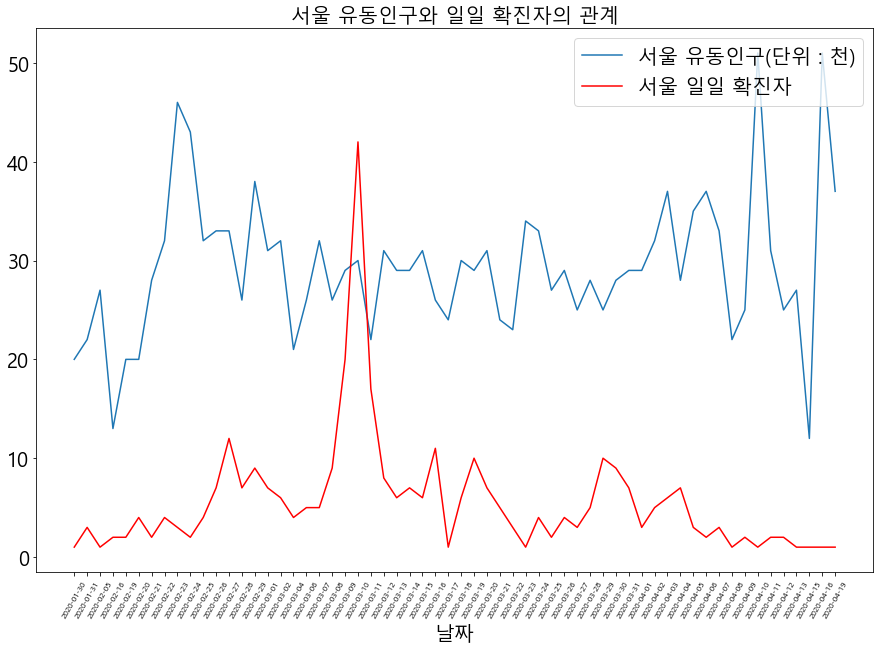

In [46]:
# 서울 유동인구와 일일 확진자의 관계(하나로 표현)
plt.figure(figsize=(15, 10))
plt.plot(df_merge_groupby['date'], df_merge_groupby['fp_num']//1000, label='서울 유동인구(단위 : 천)')
plt.plot(df_merge_groupby['date'], df_merge_groupby['count'], 'r-', label='서울 일일 확진자')
plt.xlabel('날짜', fontsize=20)
plt.xticks(fontsize=8, rotation=60)
plt.yticks(fontsize=20)
plt.title('서울 유동인구와 일일 확진자의 관계', fontsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.show()

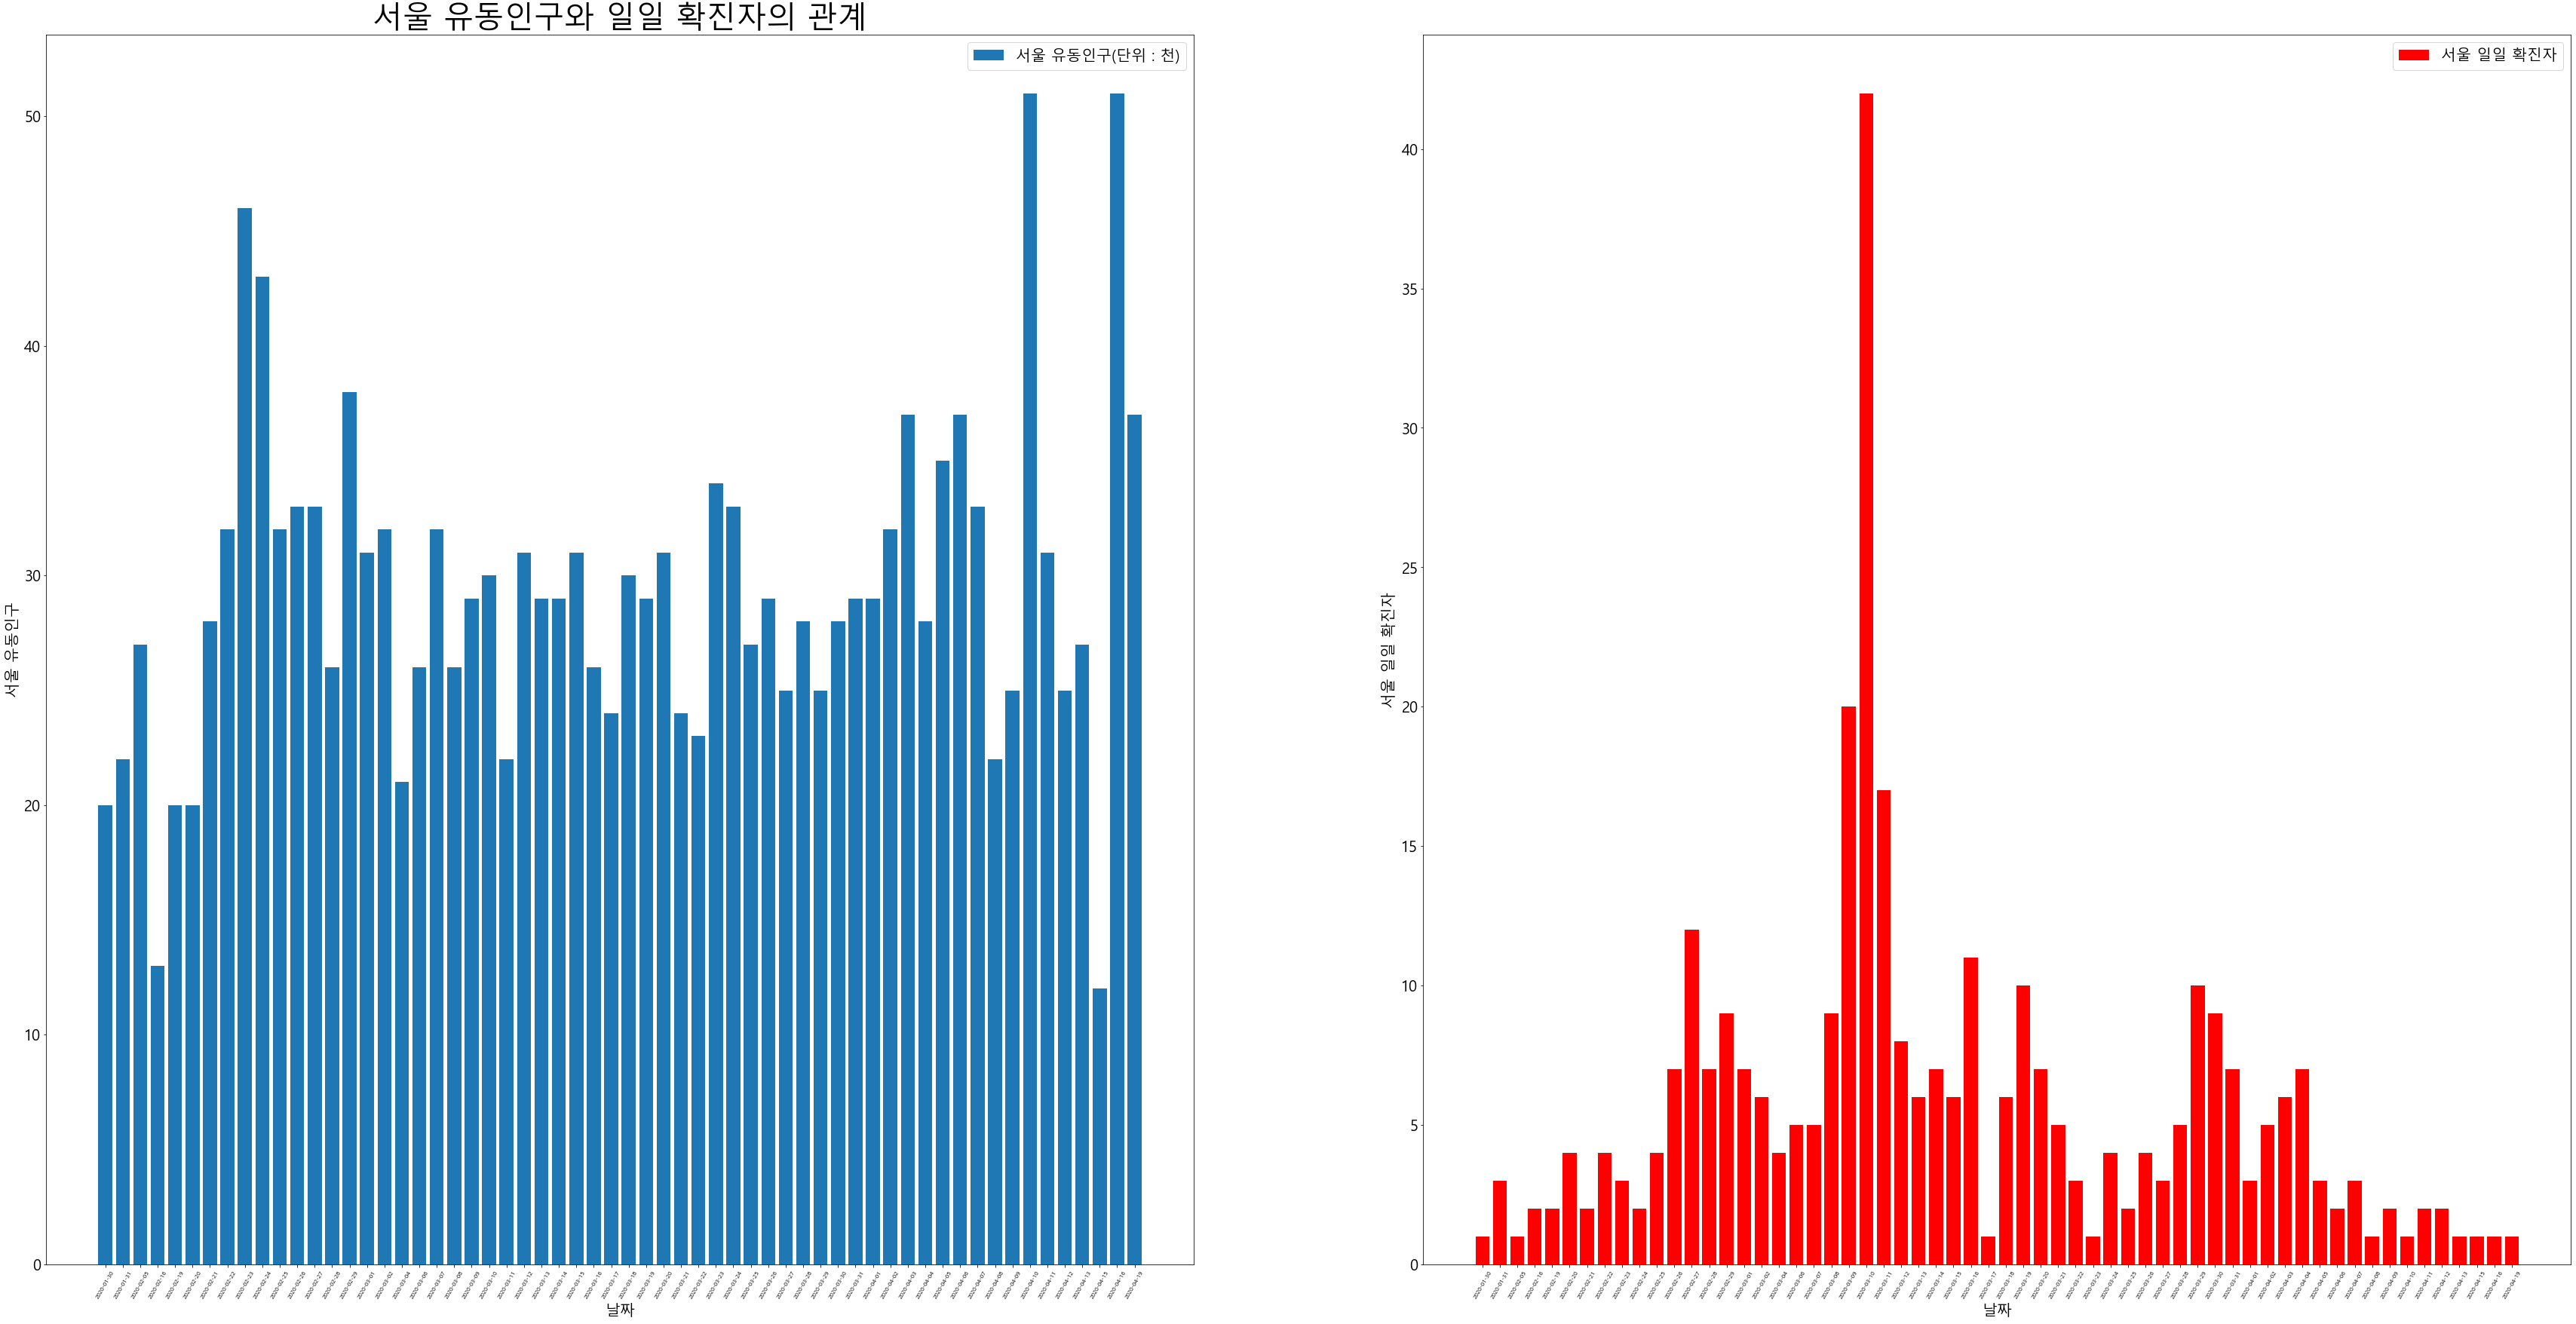

In [47]:
# 서울 유동인구와 일일 확진자의 관계(subplot)
plt.figure(figsize=(60, 30))
plt.subplot(1,2,1)
plt.bar(df_merge_groupby['date'], df_merge_groupby['fp_num']//1000, label='서울 유동인구(단위 : 천)')
plt.xlabel('날짜', fontsize=20)
plt.ylabel('서울 유동인구', fontsize=20)
plt.xticks(fontsize=8, rotation=60)
plt.yticks(fontsize=20)
plt.title('서울 유동인구와 일일 확진자의 관계', fontsize=40)
plt.legend(loc='upper right', fontsize=20)

plt.subplot(1,2,2)
plt.bar(df_merge_groupby['date'], df_merge_groupby['count'],label='서울 일일 확진자', color='red')
plt.xlabel('날짜', fontsize=20)
plt.ylabel('서울 일일 확진자', fontsize=20)
plt.xticks(fontsize=8, rotation=60)
plt.yticks(fontsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.show()

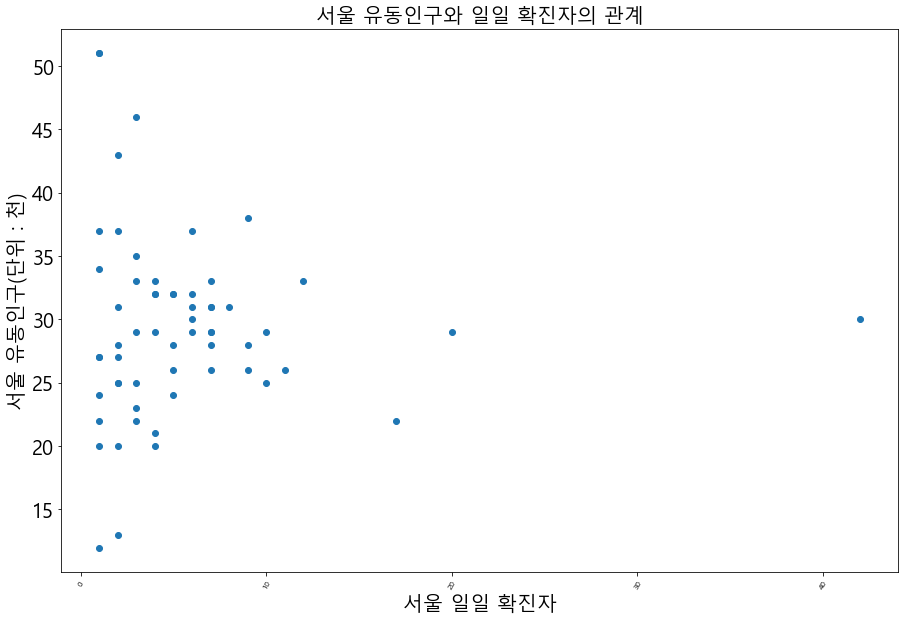

In [48]:
# 서울 유동인구와 일일 확진자의 관계 산점도(하나로 표현)
plt.figure(figsize=(15, 10))
plt.scatter(df_merge_groupby['count'], df_merge_groupby['fp_num']//1000)
plt.xlabel('서울 일일 확진자', fontsize=20)
plt.ylabel('서울 유동인구(단위 : 천)', fontsize=20)
plt.xticks(fontsize=8, rotation=60)
plt.yticks(fontsize=20)
plt.title('서울 유동인구와 일일 확진자의 관계', fontsize=20)
plt.show()

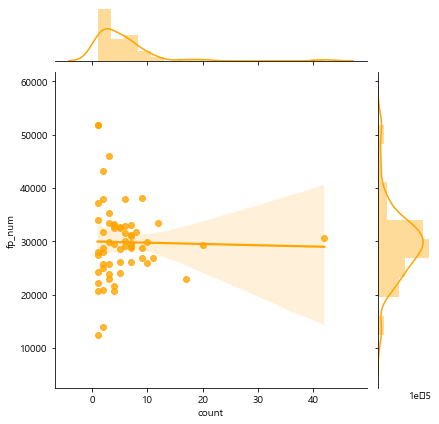

In [49]:
sns.jointplot(x='count',y='fp_num',data=df_merge_groupby,color='orange',kind='reg')
plt.show()

In [50]:
# 일일 확진자수와 유동인구 독립성 결정
# stat, p_val, degFree, expected = st.chi2_contingency(df_merge_groupby[['count','fp_num']])    # 통계량, p-값, 자유도, 기대도수.
# print("p_value : {}".format(np.round(p_val,3)))                                   # 독립이 아님!

In [51]:
# 피어슨 상관계수
np.round(st.pearsonr(df_merge_groupby['count'],df_merge_groupby['fp_num']),3)           # 상관계수와 p-값.

array([-0.02 ,  0.878])

In [52]:
# 스피어맨 상관계수
np.round(st.spearmanr(df_merge_groupby['count'],df_merge_groupby['fp_num']),3)  

array([0.078, 0.554])

In [53]:
# 캔달 상관계수
np.round(st.kendalltau(df_merge_groupby['count'],df_merge_groupby['fp_num']),3)

array([0.041, 0.653])